<a href="https://colab.research.google.com/github/ailiskab-hub/16-ass-gastrit/blob/main/Analysis_of_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import kruskal
from skbio.diversity import alpha_diversity, beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving central_summary.csv to central_summary.csv
Saving south_summary.csv to south_summary.csv
Saving south_west_summary.csv to south_west_summary.csv
Saving syberia_summary.csv to syberia_summary.csv


## Create table for all samples

In [115]:
central = pd.read_csv('central_summary.csv', index_col='...1').drop(columns=['Unnamed: 0'])
south = pd.read_csv('south_summary.csv', index_col='...1').drop(columns=['Unnamed: 0'])
south_west = pd.read_csv('south_west_summary.csv', index_col='...1').drop(columns=['Unnamed: 0'])
syb = pd.read_csv('syberia_summary.csv', index_col='...1').drop(columns=['Unnamed: 0'])

In [ ]:
id_cent = central.columns.tolist()
id_south = south.columns.tolist()
id_south_west = south_west.columns.tolist()
id_syb = syb.columns.tolist()

In [ ]:
def fill_table(central, all_table):
  for mgg in list(central.columns):
    for genus in list(central.index):
      all_table.loc[mgg, genus] = central.loc[genus, mgg]
  return all_table

In [ ]:
all_idx = id_cent+id_south+id_south_west+id_syb
all_species = list(set(central.index.tolist() + south.index.tolist() +south_west.index.tolist() + syb.index.tolist()))

all_table = pd.DataFrame(data=0, index=all_idx, columns=all_species)

In [ ]:
all_table = fill_table(central, all_table)
all_table = fill_table(south, all_table)
all_table = fill_table(syb, all_table)
all_table = fill_table(south_west, all_table)

In [ ]:
metadata = pd.DataFrame(data='central', index=['REGION'], columns=id_cent)
for mgg in id_south:
  metadata[mgg] = 'south'

for mgg in id_south_west:
  metadata[mgg] = 'south_west'

for mgg in id_syb:
  metadata[mgg] = 'syberia'

metadata = metadata.T

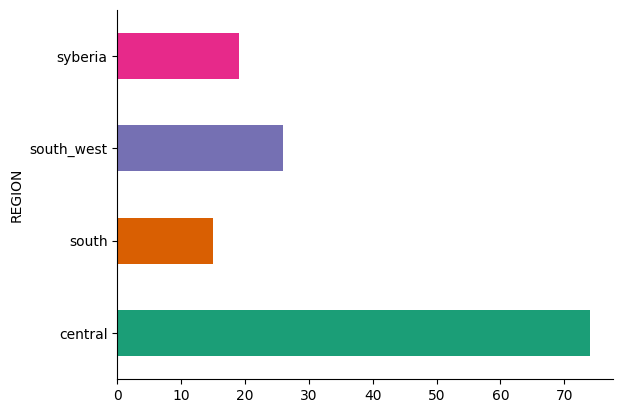

In [ ]:
# @title REGION

from matplotlib import pyplot as plt
import seaborn as sns
metadata.groupby('REGION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
all_table

,Megasphaera,Incertae_Sedis,Raoultella,Faecalibacterium,Roseburia,Elusimicrobium,Lachnospira,Peptococcus,Prevotella,Methanobrevibacter,...,Colidextribacter,Prevotellaceae_UCG-001,UCG-005,Faecalitalea,Catenibacterium,Klebsiella,Anaerosporobacter,Prevotellaceae_NK3B31_group,Collinsella,Dorea
MGG428,0.0,0.0,0.0,4.145446,0.000000,0.0,1.038495,0.0,0.000000,0.0,...,0.0,0.0,3.664609,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG437,0.0,0.0,0.0,10.105575,0.000000,0.0,2.115038,0.0,6.733519,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG480,0.0,0.0,0.0,14.155782,0.000000,0.0,2.063643,0.0,1.303728,0.0,...,0.0,0.0,1.683686,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG502,0.0,0.0,0.0,5.310767,0.000000,0.0,0.000000,0.0,4.136271,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG503,0.0,0.0,0.0,9.699051,1.492578,0.0,3.336668,0.0,22.861855,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGG1252,0.0,0.0,0.0,8.802314,0.000000,0.0,3.805276,0.0,2.376555,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG1309,0.0,0.0,0.0,8.560837,0.000000,0.0,3.431559,0.0,1.155894,0.0,...,0.0,0.0,1.598859,0.0,2.100760,0.0,0.0,0.0,0.000000,0.0
MGG1388,0.0,0.0,0.0,8.362051,2.892763,0.0,9.483073,0.0,6.032840,0.0,...,0.0,0.0,1.133185,0.0,0.000000,0.0,0.0,0.0,2.225826,0.0
MGG1593,0.0,0.0,0.0,8.806727,4.552390,0.0,3.282120,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,5.641699,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# all_table['Region'] = metadata['REGION']

In [ ]:
# all_table.drop(columns=['Region'], inplace=True)
all_table

,Megasphaera,Incertae_Sedis,Raoultella,Faecalibacterium,Roseburia,Elusimicrobium,Lachnospira,Peptococcus,Prevotella,Methanobrevibacter,...,Colidextribacter,Prevotellaceae_UCG-001,UCG-005,Faecalitalea,Catenibacterium,Klebsiella,Anaerosporobacter,Prevotellaceae_NK3B31_group,Collinsella,Dorea
MGG428,0.0,0.0,0.0,4.145446,0.000000,0.0,1.038495,0.0,0.000000,0.0,...,0.0,0.0,3.664609,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG437,0.0,0.0,0.0,10.105575,0.000000,0.0,2.115038,0.0,6.733519,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG480,0.0,0.0,0.0,14.155782,0.000000,0.0,2.063643,0.0,1.303728,0.0,...,0.0,0.0,1.683686,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG502,0.0,0.0,0.0,5.310767,0.000000,0.0,0.000000,0.0,4.136271,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG503,0.0,0.0,0.0,9.699051,1.492578,0.0,3.336668,0.0,22.861855,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGG1252,0.0,0.0,0.0,8.802314,0.000000,0.0,3.805276,0.0,2.376555,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
MGG1309,0.0,0.0,0.0,8.560837,0.000000,0.0,3.431559,0.0,1.155894,0.0,...,0.0,0.0,1.598859,0.0,2.100760,0.0,0.0,0.0,0.000000,0.0
MGG1388,0.0,0.0,0.0,8.362051,2.892763,0.0,9.483073,0.0,6.032840,0.0,...,0.0,0.0,1.133185,0.0,0.000000,0.0,0.0,0.0,2.225826,0.0
MGG1593,0.0,0.0,0.0,8.806727,4.552390,0.0,3.282120,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,5.641699,0.0,0.0,0.0,0.000000,0.0


## Explore species in the data

In [116]:
def define_top(central, show=True, drop=True, stats=True, norm=True):
    if drop:
        central.drop(index=['Unclassified'], inplace=True)

    central_norm = pd.DataFrame(data= MinMaxScaler().fit_transform(central), index = central.index, columns = central.columns) if norm else central
    if show:
        fig, ax = plt.subplots(figsize=(11,9))
        sns.heatmap(central_norm, cmap="Greens")

    if stats:

        print("By mean")
        print(central_norm.T.describe().T['mean'].sort_values(ascending=False)[:10])

By mean
...1
Bacteroides              0.885603
Faecalibacterium         0.342916
Prevotella               0.244797
Alistipes                0.163733
Parabacteroides          0.106530
Phascolarctobacterium    0.104693
Agathobacter             0.098206
Akkermansia              0.094914
Lachnospira              0.094192
Bifidobacterium          0.093716
Name: mean, dtype: float64


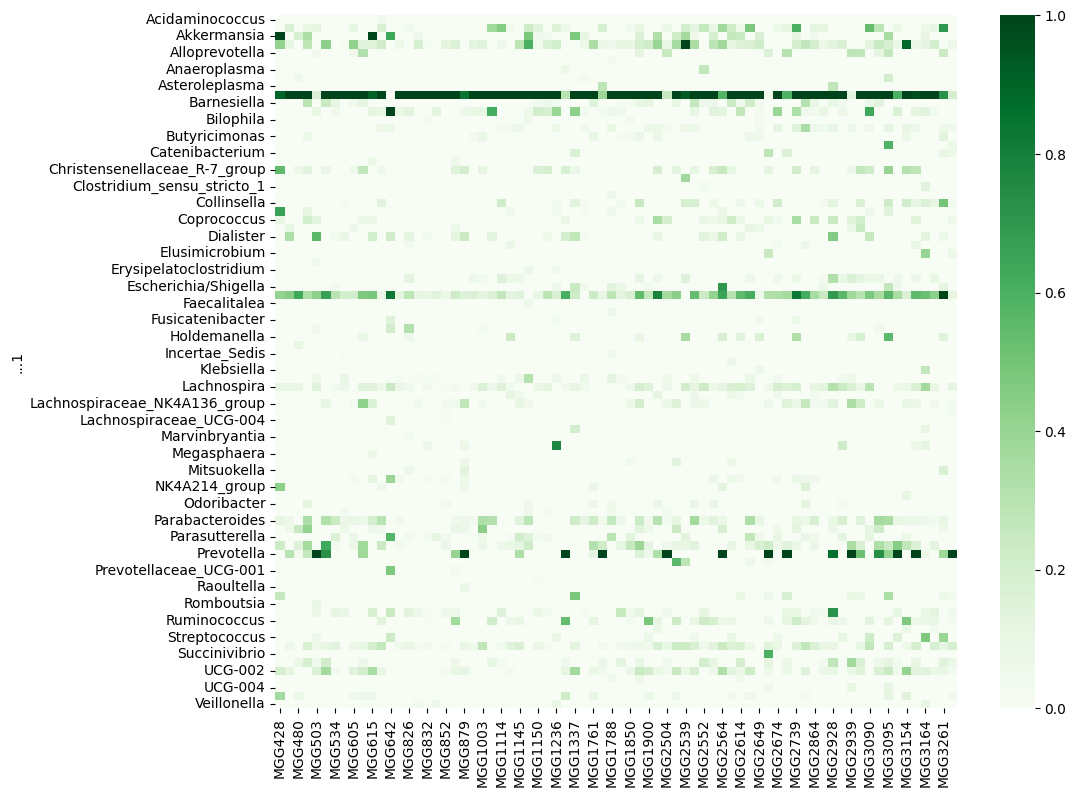

In [117]:
define_top(central, drop=True)

By mean
...1
Bacteroides              0.896013
Faecalibacterium         0.248900
Prevotella               0.166479
Phascolarctobacterium    0.147795
Alistipes                0.111654
Ruminococcus             0.111268
Lachnospira              0.095103
Subdoligranulum          0.091770
Roseburia                0.091016
Escherichia/Shigella     0.089496
Name: mean, dtype: float64


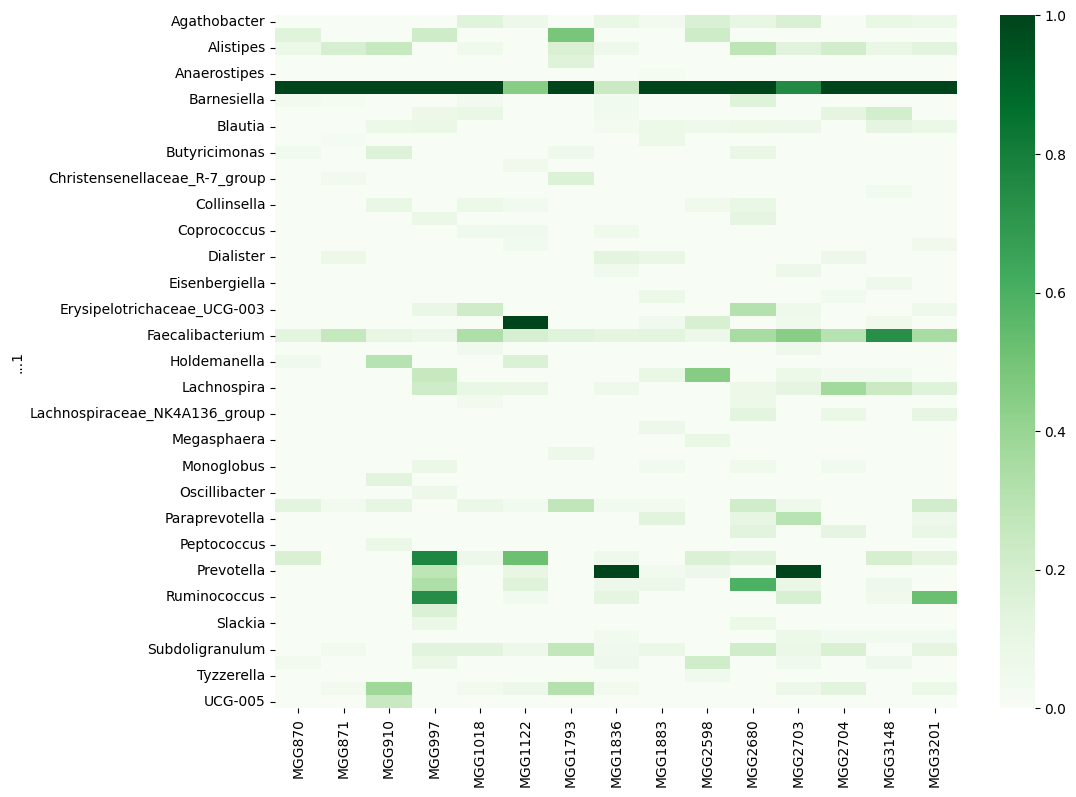

In [118]:
define_top(south)

By mean
...1
Bacteroides              0.812533
Faecalibacterium         0.310036
Prevotella               0.266297
Alistipes                0.121509
Dialister                0.102259
UCG-002                  0.098420
Akkermansia              0.095988
Ruminococcus             0.093177
Subdoligranulum          0.091785
Phascolarctobacterium    0.088567
Name: mean, dtype: float64


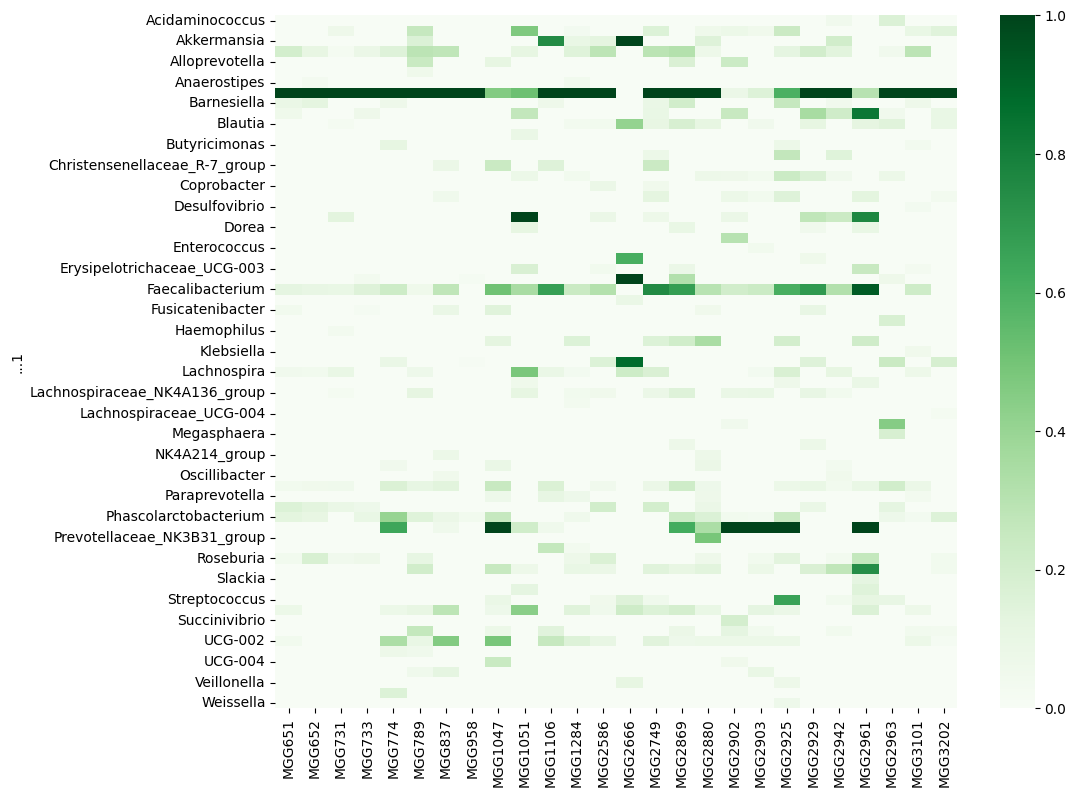

In [119]:
define_top(south_west)

By mean
...1
Bacteroides         0.856495
Faecalibacterium    0.320205
Prevotella          0.249989
Lachnospira         0.169446
UCG-002             0.118897
Subdoligranulum     0.116552
Parabacteroides     0.116300
Agathobacter        0.112108
Alistipes           0.107324
Bifidobacterium     0.104578
Name: mean, dtype: float64


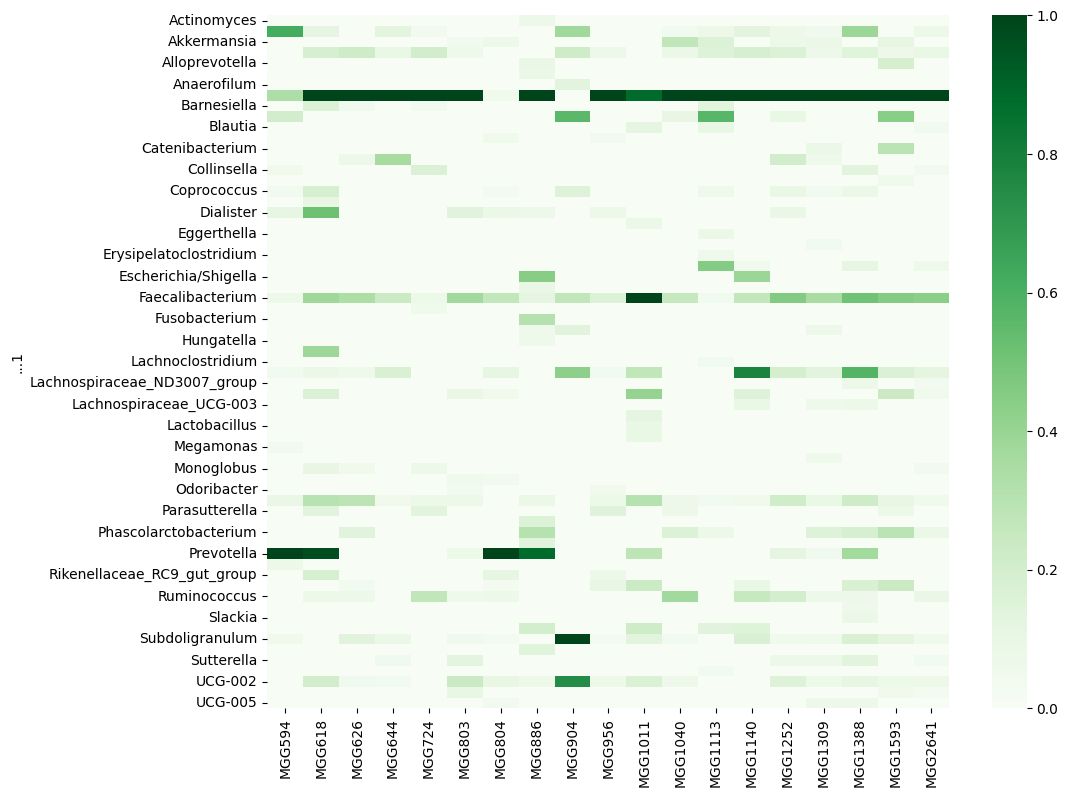

In [120]:
define_top(syb)

In [ ]:
all_table_T = all_table.T

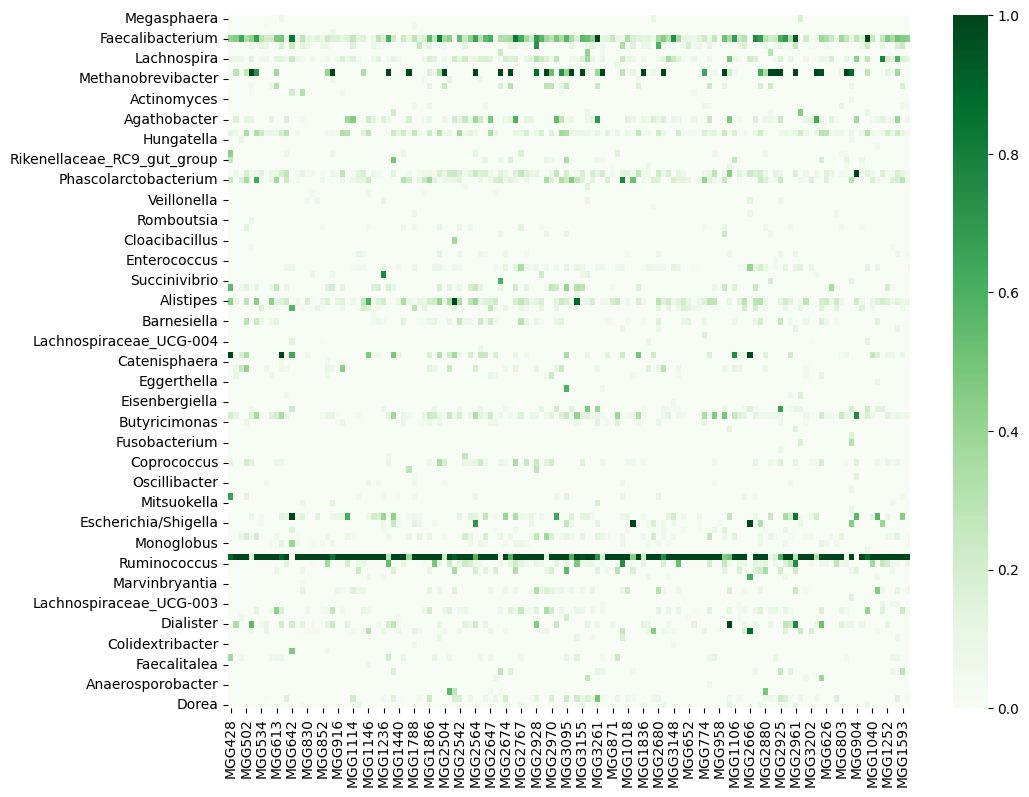

In [ ]:
define_top(all_table_T, drop=True, stats=False)

## Expore the difference with healthy person

In [ ]:
ne_tadjic = pd.read_csv('ERP012803_taxonomy_abundances_SSU_v5.0.csv', sep=';', low_memory=False)
# ne_tadjic = pd.read_csv('ne_tadjic.csv', low_memory=False)


In [ ]:
import re
def striiip(string):
    pattern = r'(?<=g__)[A-Za-z]+(?=;)?'
    res = re.search(pattern, string)
    return res.group(0) if res else np.NaN


In [ ]:
ne_tadjic['#SampleID'] = ne_tadjic['#SampleID'].apply(striiip)

In [ ]:
ne_tadjic = ne_tadjic.dropna()

In [ ]:
ne_tadjic = ne_tadjic.set_index('#SampleID')

In [ ]:
gastro_bact = set(all_table_T.index)
health_bact = set(ne_tadjic.index)

In [ ]:
tab = list(health_bact.intersection(gastro_bact))

In [ ]:
ne_tadjic = ne_tadjic.groupby('#SampleID').sum()

In [ ]:
tenoten = ne_tadjic.loc[tab, ]

In [122]:
# tenoten = pd.read_csv('tenoten.csv')
# tenoten = tenoten.set_index('#SampleID')
# tab = list(tenoten.index)

In [ ]:
# ne_tadjic.to_csv('ne_tadjic.csv')

In [ ]:
tenoten

,ERR10015970,ERR10015980,ERR10015971,ERR10015981,ERR10015972,ERR10015982,ERR10015973,ERR10015983,ERR10015974,ERR10015984,...,ERR2404990,ERR2405000,ERR2405010,ERR2405020,ERR2405030,ERR2405040,ERR2405050,ERR2405060,ERR2405070,ERR2405080
#SampleID,,,,,,,,,,,,,,,,,,,,,
Succinivibrio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coprobacter,0,0,0,0,0,0,0,0,0,0,...,0,16,0,0,0,2,3,0,0,0
Butyricimonas,0,0,0,0,0,0,0,0,0,0,...,0,12,0,3,0,1,10,33,14,0
Alloprevotella,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,38,0,0,0,0,0
Lachnospira,1,0,27,0,0,0,0,0,0,0,...,4,8,0,44,1,40,23,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Senegalimassilia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sutterella,0,0,0,0,0,0,0,0,0,0,...,1,45,0,29,0,0,0,38,0,0
Parasutterella,0,0,117,0,35,1,2,0,0,0,...,0,2,2,8,18,86,0,17,110,0


In [123]:
drop_id = tenoten.sum(axis=0)[tenoten.sum(axis=0)==0].index
tenoten = tenoten.drop(columns=drop_id)

By mean
#SampleID
Bacteroides         0.691662
Faecalibacterium    0.307824
Streptococcus       0.158128
Roseburia           0.113678
Alistipes           0.109712
Parabacteroides     0.090493
Akkermansia         0.077749
Blautia             0.068781
Subdoligranulum     0.065608
Bifidobacterium     0.062863
Name: mean, dtype: float64


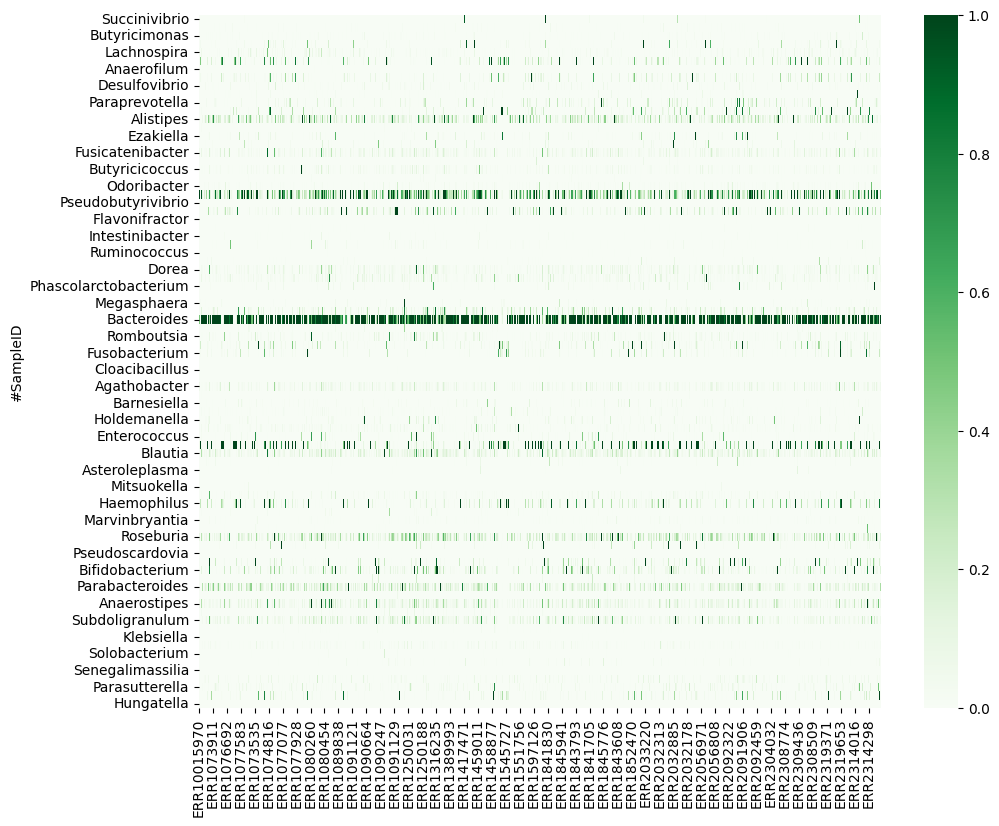

In [124]:
define_top(tenoten, drop=False)

In [125]:
tenoten_norm = pd.DataFrame(data= MinMaxScaler().fit_transform(tenoten), index = tenoten.index, columns = tenoten.columns)

In [ ]:
tenoten_norm


,ERR10015970,ERR10015980,ERR10015971,ERR10015981,ERR10015972,ERR10015982,ERR10015973,ERR10015983,ERR10015974,ERR10015984,...,ERR2404990,ERR2405000,ERR2405010,ERR2405020,ERR2405030,ERR2405040,ERR2405050,ERR2405060,ERR2405070,ERR2405080
#SampleID,,,,,,,,,,,,,,,,,,,,,
Succinivibrio,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Coprobacter,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.004862,0.00000,0.000000,0.000000,0.000467,0.004580,0.000000,0.000000,0.0
Butyricimonas,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.003646,0.00000,0.002822,0.000000,0.000234,0.015267,0.019608,0.008495,0.0
Alloprevotella,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.010348,0.015827,0.000000,0.000000,0.000000,0.000000,0.0
Lachnospira,0.001391,0.0,0.002045,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.007168,0.002431,0.00000,0.041392,0.000416,0.009346,0.035115,0.000594,0.007282,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Senegalimassilia,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Sutterella,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.001792,0.013674,0.00000,0.027281,0.000000,0.000000,0.000000,0.022579,0.000000,0.0
Parasutterella,0.000000,0.0,0.008864,0.0,0.009521,0.032258,0.00641,0.0,0.0,0.0,...,0.000000,0.000608,0.00551,0.007526,0.007497,0.020093,0.000000,0.010101,0.066748,0.0


In [128]:
all_tabac_norm = pd.DataFrame(data= MinMaxScaler().fit_transform(all_table_T.loc[tab, ]), index = all_table_T.loc[tab, ].index, columns = all_table_T.loc[tab, ].columns)

In [129]:
mean_bb = tenoten_norm.mean(axis=1).values
mean_bb = mean_bb.reshape(-1, 1)
# mean_bb

By mean
Prevotella               0.214937
Bacteroides              0.179906
Phascolarctobacterium    0.097978
Lachnospira              0.088628
Ruminococcus             0.079020
Agathobacter             0.063554
Coprococcus              0.036813
Alistipes                0.032000
Barnesiella              0.030963
Subdoligranulum          0.030647
Name: mean, dtype: float64


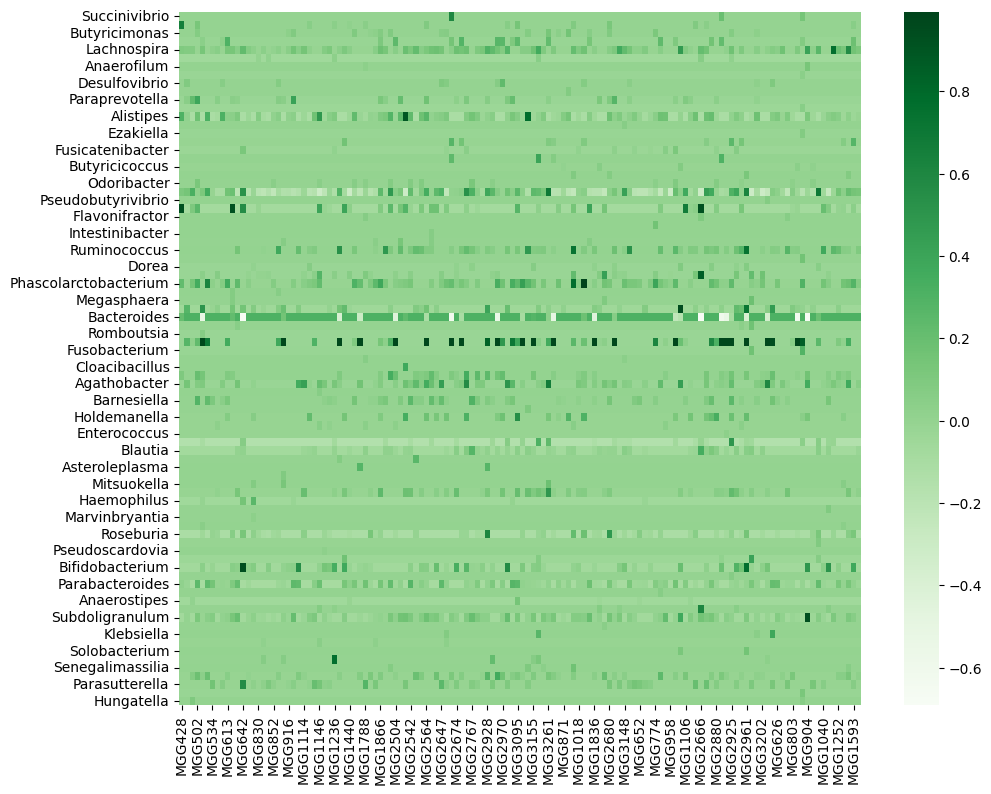

In [130]:
define_top(all_tabac_norm - mean_bb, drop=False, norm=False)

In [131]:
differ = all_tabac_norm - mean_bb

## Identify the bacteria that are more or less abundant in samples with gastritis.

In [132]:
pos_sp = differ.mean(axis=1)[differ.mean(axis=1)>0.01].index

By mean
Prevotella               0.214937
Bacteroides              0.179906
Phascolarctobacterium    0.097978
Lachnospira              0.088628
Ruminococcus             0.079020
Agathobacter             0.063554
Coprococcus              0.036813
Alistipes                0.032000
Barnesiella              0.030963
Subdoligranulum          0.030647
Name: mean, dtype: float64


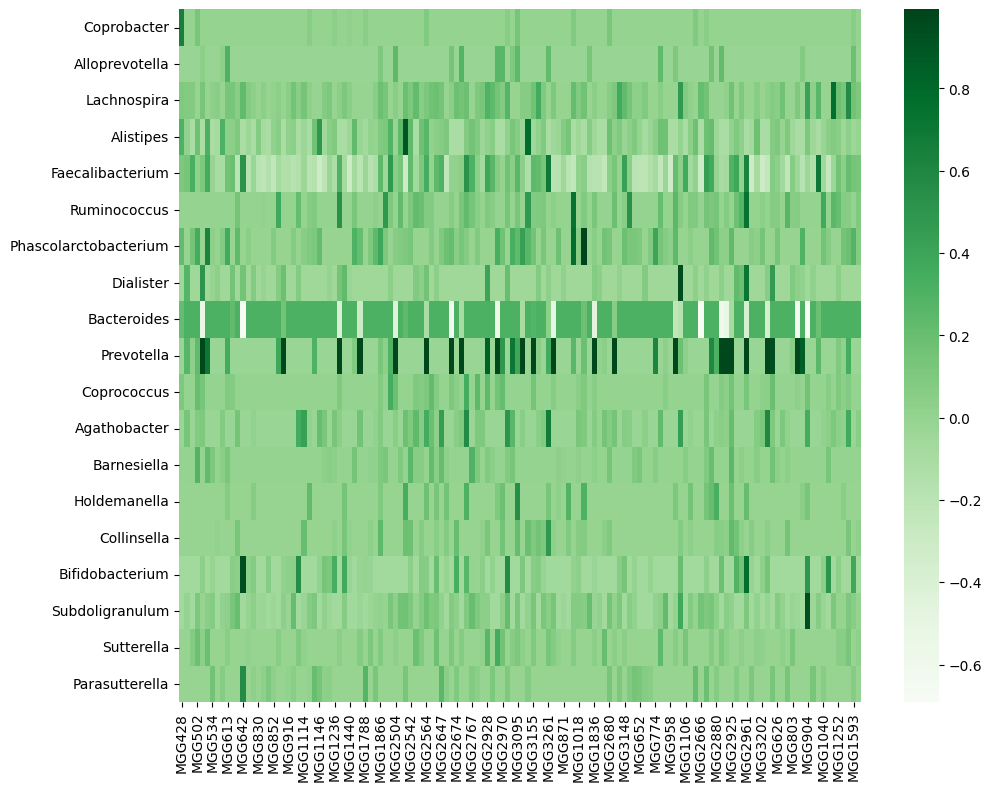

In [133]:
pos_change = differ.loc[pos_sp, ]#.drop(index=['Bacteroides', 'Prevotella'])
define_top(pos_change, drop=False, norm=False)

By mean
Butyricicoccus      0.809461
Lactococcus         0.806644
Ezakiella           0.787203
Fusobacterium       0.776832
Porphyromonas       0.757406
Romboutsia          0.746658
Dorea               0.746166
Actinomyces         0.734574
Fusicatenibacter    0.715900
Lactobacillus       0.686345
Name: mean, dtype: float64


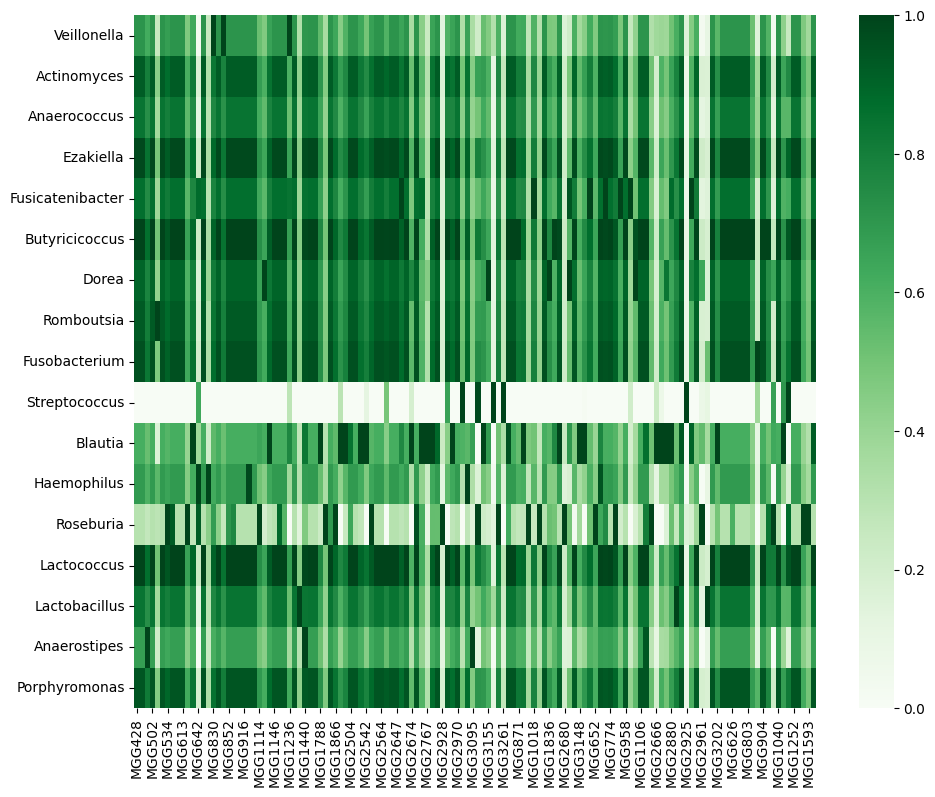

In [134]:
neg_sp = differ.mean(axis=1)[differ.mean(axis=1)<-0.01].index
neg_change = differ.loc[neg_sp, ]
define_top(neg_change, drop=False, norm=True)

In [ ]:
def color_hm(all_table_T_d):
  cm = {'central': 'Blues', 'south': 'Reds', 'south_west':'Greens', "syberia":'Oranges'}
  f, axs = plt.subplots(1, all_table_T_d.columns.size, figsize= (18,9))
  for i, (s, a, c) in enumerate(zip(all_table_T_d.columns, axs, metadata.T.values[0])):

      sns.heatmap(np.array([all_table_T_d[s].values]).T, yticklabels=all_table_T_d.index, annot=False, xticklabels=[s], ax=a, cmap=cm[c], cbar=False)
      if i>0:
          a.yaxis.set_ticks([])

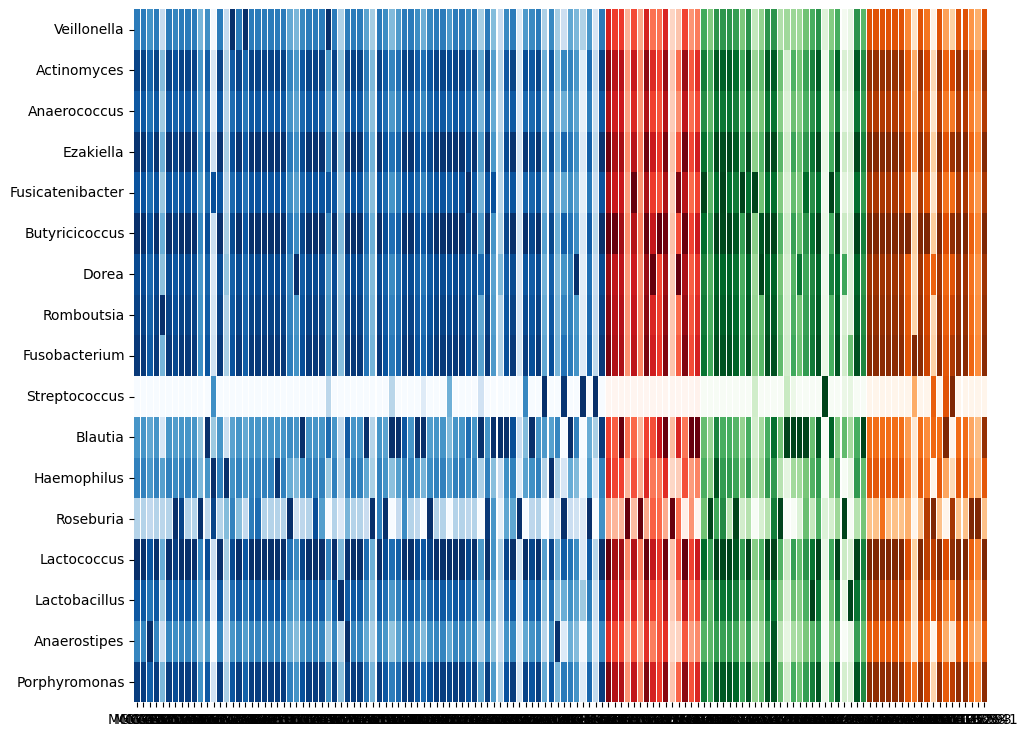

In [ ]:
# these bacterias are less abundant
color_hm(neg_change)

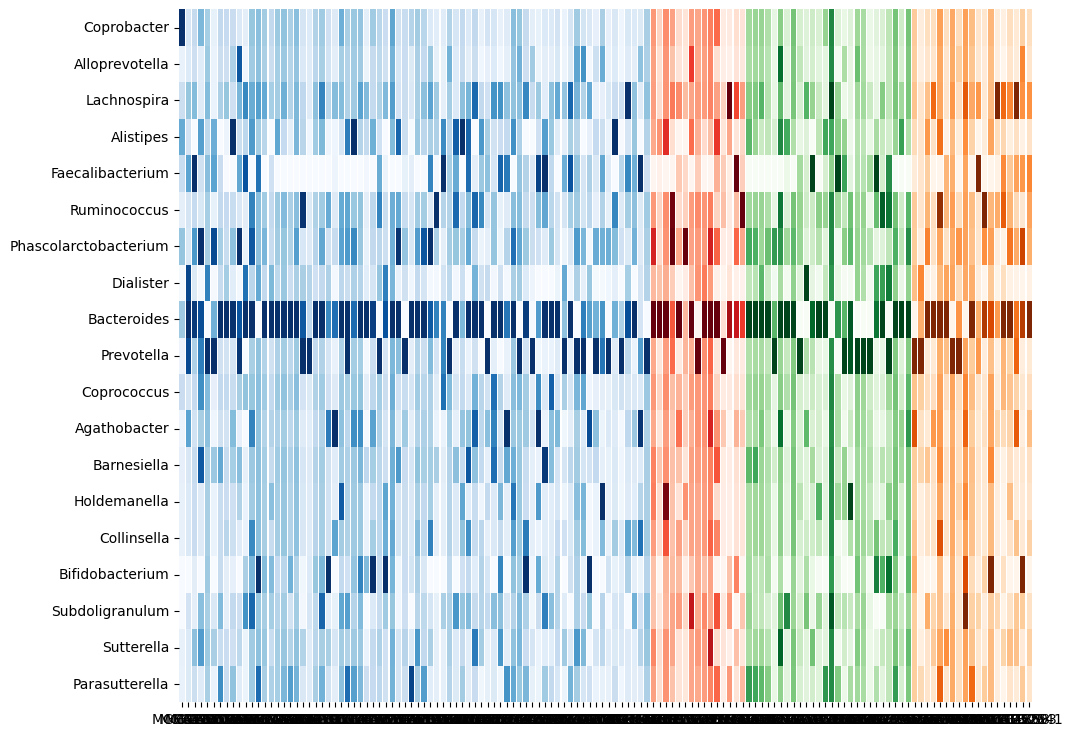

In [ ]:
# these bacterias are more abundant
color_hm(pos_change)

## Take a look to the bacterias in the general table with regions

Regions are hightlighted with color

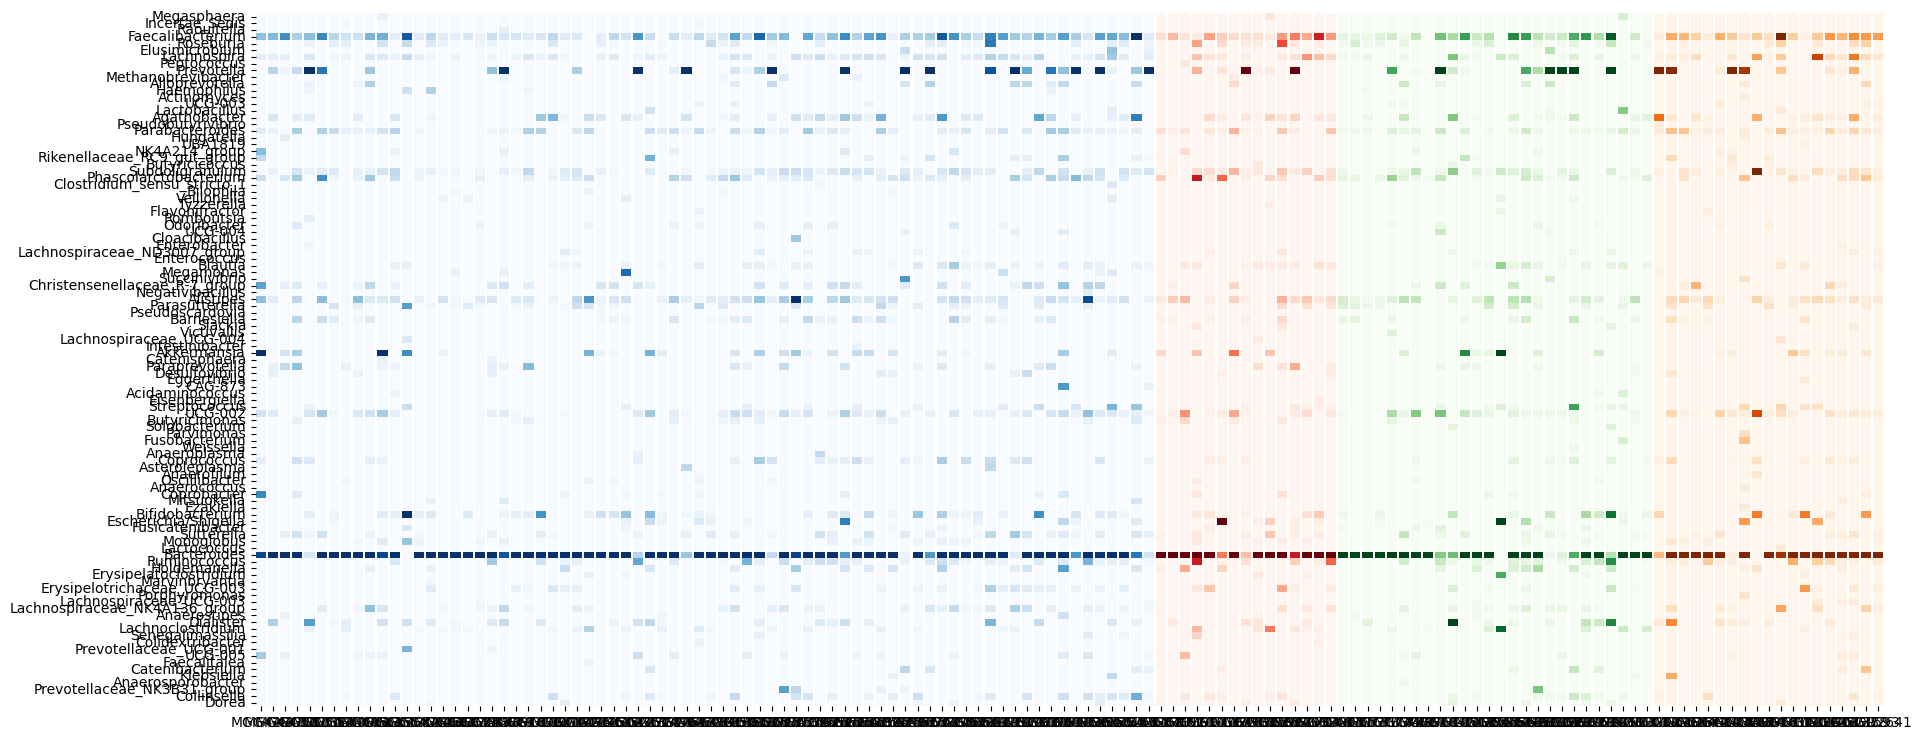

In [ ]:
color_hm(all_table_T)

In [ ]:
# Drop the 'Bacteroides' and 'Faecalibacterium' (to look presence of othes genus)
all_table_T_d = all_table_T.drop(index=['Bacteroides', 'Faecalibacterium'])

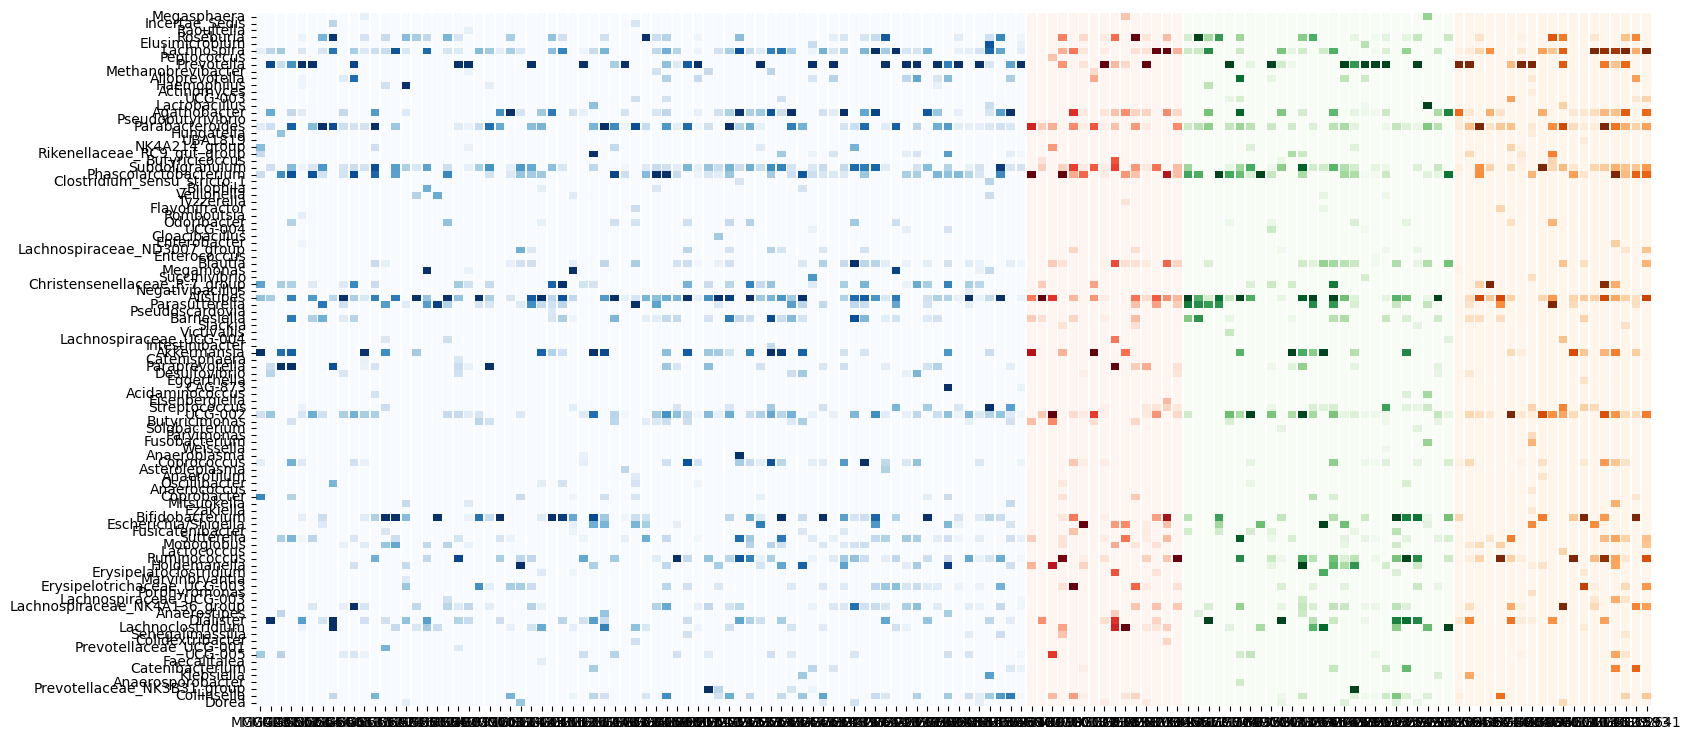

In [ ]:
f, axs = plt.subplots(1, all_table_T_d.columns.size, figsize= (18,9))
for i, (s, a, c) in enumerate(zip(all_table_T_d.columns, axs, metadata.T.values[0])):
    sns.heatmap(np.array([all_table_T_d[s].values]).T, yticklabels=all_table_T_d.index, annot=False, xticklabels=[s], ax=a, cmap=cm[c], cbar=False)
    if i>0:
        a.yaxis.set_ticks([])

## Explore the abundance of bacterias that are not presanted in the CURRENT data of healt human

But we remember that there could be just some difference in classification

In [ ]:
gastro_only = list(set(all_table_T.index).difference(set(tab)))

In [ ]:
gastro_tab = all_table[gastro_only].T

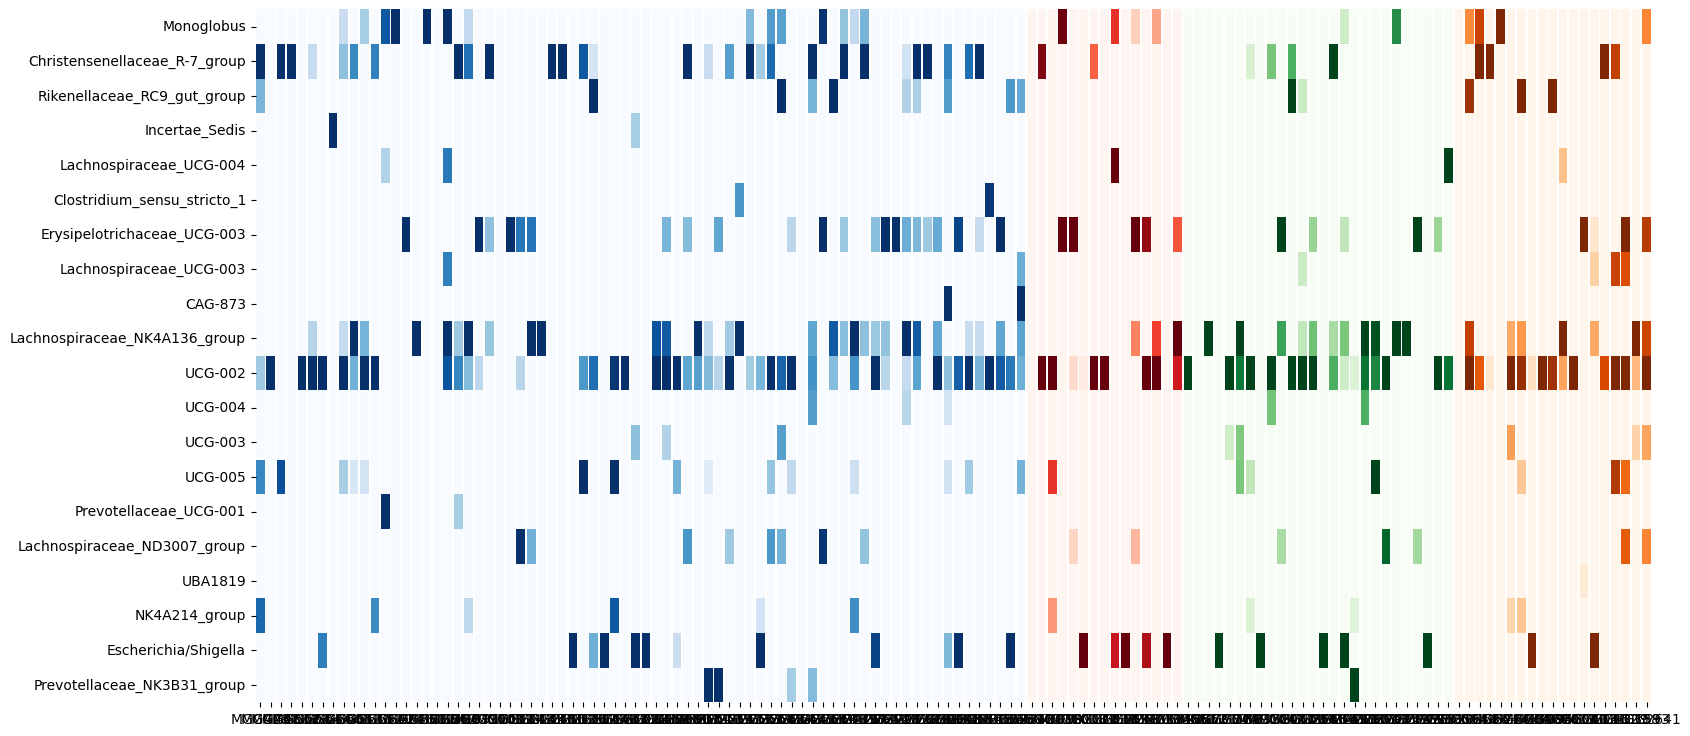

In [ ]:
color_hm(gastro_tab)

In [ ]:
all_table.to_csv('all_table_final.csv')

In [ ]:
# all_table_norm = pd.DataFrame(data= MinMaxScaler().fit_transform(all_table), index = all_table.index, columns = all_table.columns)

## Take a look to divercity and get necessary statistics

In [138]:
df = pd.read_csv('all_table_final.csv')
df_norm = df.set_index('Unnamed: 0').div(df.set_index('Unnamed: 0').sum(axis=1), axis=0)

# alpha diversity (Shannon)
df_norm['shannon'] = alpha_diversity('shannon', df_norm, ids=df_norm.index)

# Compare it across regions (Kruskal-Wallis)
df_norm['region'] = metadata['REGION'].values
kw_result = kruskal(*[df_norm[df_norm['region'] == region]['shannon'] for region in df_norm['region'].unique()])
print(f"Kruskal-Wallis : H-statistic = {kw_result.statistic}, p-value = {kw_result.pvalue}")



Kruskal-Wallis : H-statistic = 2.2290322227478896, p-value = 0.5262525899364827


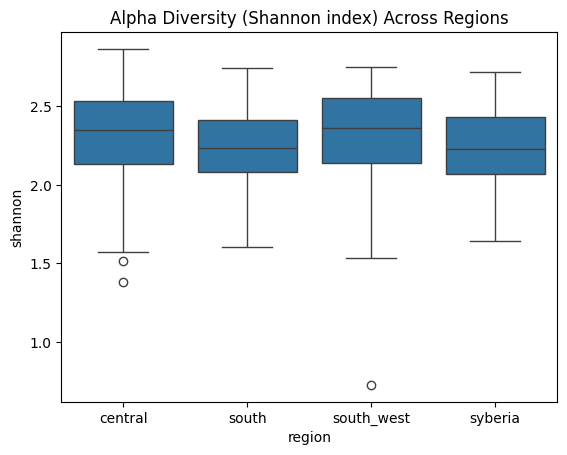

In [139]:
sns.boxplot(x='region', y='shannon', data=df_norm)
plt.title('Alpha Diversity (Shannon index) Across Regions')
plt.show()


/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.2031529426103338 and the largest is 5.0876514279671845.
  warn(


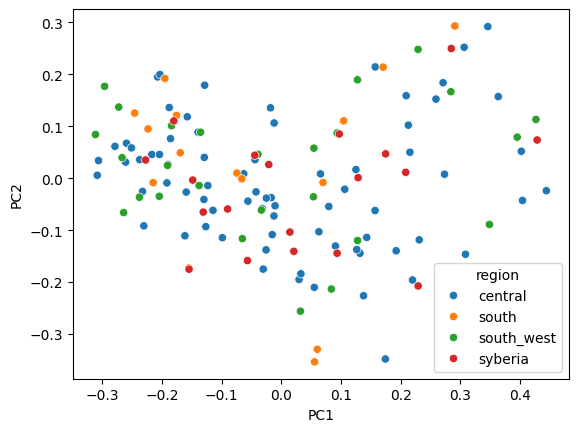

In [140]:
# beta diversity (Bray-Curtis)
beta_div = beta_diversity('braycurtis', df_norm.drop(columns=['region', 'shannon']), ids=df_norm.index)
pcoa_results = pcoa(beta_div)

pcoa_df = pcoa_results.samples
pcoa_df['region'] = df_norm['region']
sns.scatterplot(x=pcoa_df['PC1'], y=pcoa_df['PC2'], hue=pcoa_df['region'])
plt.show()

In [141]:
# PERMANOVA
permanova_res = permanova(beta_div, df_norm['region'])
print(f"PERMANOVA result: F-statistic = {permanova_res['test statistic']}, p-value = {permanova_res['p-value']}")




PERMANOVA result: F-statistic = 0.7691304946450724, p-value = 0.812


In [143]:
# # Taxa abundance
# sns.heatmap(df_norm.drop(columns=['region', 'shannon']))
# plt.show()